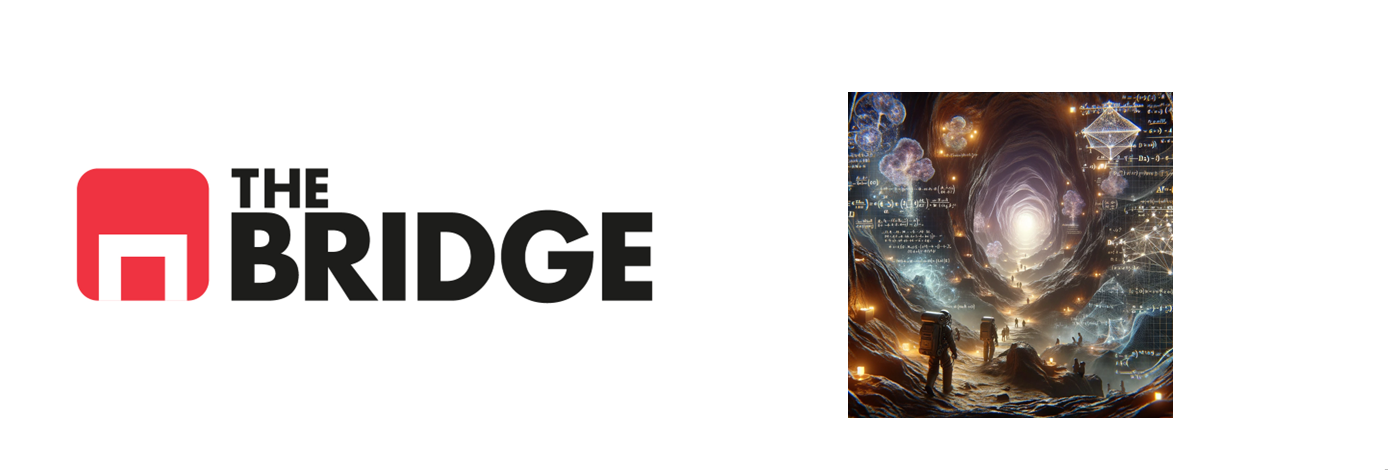![image.png](attachment:image.png)

## PRACTICA OBLIGATORIA: **Introducción Keras**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de modelado del dataset del titanic empleando y comparando dos modelos diferentes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo.
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report,r2_score,RocCurveDisplay, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
import os
os.environ["KERAS_BACKEND"] = "jax"
import keras
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC,Recall,Accuracy,Precision
from tensorflow.keras.callbacks import TensorBoard
from keras.utils import to_categorical
#from tensorflow.keras.optimizers import Adam, ReduceLROnPlateau



# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Código para los tamaños de las fuentes y los "ticks" de los ejes:
plt.rc('font', size=6)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Descripción de la práctica

En esta práctica el objetivo es jugar con el framework de [Keras](https://www.tensorflow.org/guide/keras) a partir de la construcción de un modelo DL sobre MLP para clasificar imagenes de ropa como camisetas, zapatos y zapatillas deportivas.

Vamos a utilizar el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles)

![image.png](attachment:image.png)

La *class* de ropa que la imagen representa:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset, es recomendable construirse una lista o un diccionario que permita mapear la clase a el tipo literal.

Se pide:

0. Cargar el dataset desde TensorFlow (tienes una celda ya proporcionada para hacerlo) y visualiza al menos 5 instancias, se recomienda crear una función que permita visualizar subsets de instancias con su etiqueta adecuada.

1. Construir un modelo DL basado en MLP, es decir una red densa que clasifique las imágenes de ropa. No vas a necesitar más de 1 o 2 capas ocultas. Recuerda que es un problema de clasificación multiclase para configurar correctamente la capa de salida en número de neuronas y función de activiación. Ten en cuenta también que necesitarás utilizar una capa que aplane las imágenes o bien convertir el dataset por tu cuenta.

2. No crees un set de validación, especifica en el entrenamiento que emplee un 20% del dataset en validación. Además muestra gráficamente la evolución en el entrenamiento de la pérdida (loss) por un lado (del conjuto de train y del de validación) y la evolución de la métrica escogida (también de train  y de validación). Razona si es conveniente tener un "callback" de earlystopping, y, en cualquier caso, implementa uno.

3. Finalmente evalua contra test. Muestra el report de clasificación y haz un análisis de los resultados. Para ello, muestra algunas predicciones, el nivel de confianza y si era acertada o no, además muestra la matriz de confusión y analiza en que tipos se confunde más y con que otra clase lo confunde.

Ejemplo del grafico de predicción más nivel de confianza:

![image.png](attachment:image.png)

Fíjate que el gráfico de la derecha muestra la probabilidad por clase, de forma que cuanto más alta la probabilidad de la clase elegida más confianza podemos decir que tiene en el resultado.

**EXTRA**: Como parte extra, obtén los errores de clasificación en los que la confianza del modelo sobre su clasificación errónea supere el 0.7 o 70% (es decir los errores en los que la probabilidad de la clase elegida, equivocadamente, fuera igual o superior a 0.7), de existir muéstralos y analiza si son de alguna clase específica.

In [191]:
dt = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [192]:
label_class_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


In [193]:
# Cargar FASHION_MNIST

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images.min()

0

In [194]:
train_images.max()

255

SPLITS

In [195]:
# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [196]:
# Escalar las características para mejorar el rendimiento del modelo pero de una forma especial, dividiendo el numero de pixeles / el nuemro maximo 255
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [197]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [198]:
# Convertir las etiquetas a one-hot
y_train_one_hot = to_categorical(y_train)
y_test_one_hot= to_categorical(y_test)

In [199]:
y_train_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [200]:
# modelo secuencial
model = tf.keras.models.Sequential()

# Capa de aplanamiento para convertir imágenes 2D en un vector 1D
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

# Primera capa densa con 300 neuronas y activación ReLU
model.add(tf.keras.layers.Dense(units=300, activation='relu'))

# Segunda capa densa con 100 neuronas y activación ReLU
model.add(tf.keras.layers.Dense(units=300, activation='relu'))

# Capa de salida con 10 neuronas (una para cada clase) y activación softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['Recall'])


#usamos esta funcion de keras como regulador del overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train_one_hot, batch_size=64 ,epochs=30, validation_split=0.1)

#print(history.history.keys())

# Predicción
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#nombres de la etiquetas reales segun el diccionario creado mas arriba
y_pred_names = [label_class_dict[class_num] for class_num in y_pred_classes]
print(y_pred_names)
# Resumen del modelo
model.summary()


Epoch 1/30
675/675 [==============================] - 3s 3ms/step - loss: 3943324530652865363968.0000 - recall: 0.0031 - val_loss: 2.3085 - val_recall: 0.0000e+00
Epoch 2/30
675/675 [==============================] - 2s 3ms/step - loss: 2.3027 - recall: 0.0000e+00 - val_loss: 2.3085 - val_recall: 0.0000e+00
Epoch 3/30
675/675 [==============================] - 2s 3ms/step - loss: 2.3026 - recall: 0.0000e+00 - val_loss: 2.3085 - val_recall: 0.0000e+00
Epoch 4/30
675/675 [==============================] - 2s 3ms/step - loss: 2.3026 - recall: 0.0000e+00 - val_loss: 2.3085 - val_recall: 0.0000e+00
Epoch 5/30
675/675 [==============================] - 2s 4ms/step - loss: 2.3026 - recall: 0.0000e+00 - val_loss: 2.3085 - val_recall: 0.0000e+00
Epoch 6/30
675/675 [==============================] - 2s 3ms/step - loss: 2.3026 - recall: 0.0000e+00 - val_loss: 2.3085 - val_recall: 0.0000e+00
Epoch 7/30
675/675 [==============================] - 2s 3ms/step - loss: 2.3026 - recall: 0.0000e+00 - val

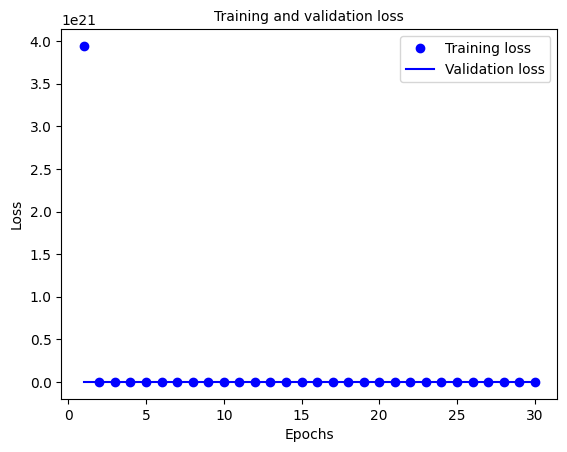

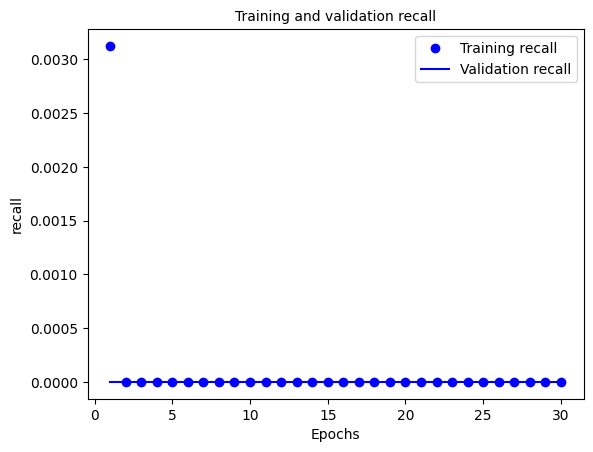

In [205]:
# funcion de perdida respeto a la metrica escogida
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
recall_values = history_dict['recall']
val_recall_values = history_dict['val_recall']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

plt.plot(epochs, recall_values, 'bo', label='Training recall')
plt.plot(epochs, val_recall_values, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('recall')
plt.legend()
plt.show()


In [242]:
#history_dict

3. Finalmente evalua contra test. Muestra el report de clasificación y haz un análisis de los resultados. Para ello, muestra algunas predicciones, el nivel de confianza y si era acertada o no, además muestra la matriz de confusión y analiza en que tipos se confunde más y con que otra clase lo confunde.

In [206]:
# Métricas de clasificación
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1202
           1       0.00      0.00      0.00      1219
           2       0.00      0.00      0.00      1205
           3       0.00      0.00      0.00      1184
           4       0.00      0.00      0.00      1202
           5       0.00      0.00      0.00      1211
           6       0.00      0.00      0.00      1218
           7       0.10      1.00      0.18      1159
           8       0.00      0.00      0.00      1197
           9       0.00      0.00      0.00      1203

    accuracy                           0.10     12000
   macro avg       0.01      0.10      0.02     12000
weighted avg       0.01      0.10      0.02     12000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


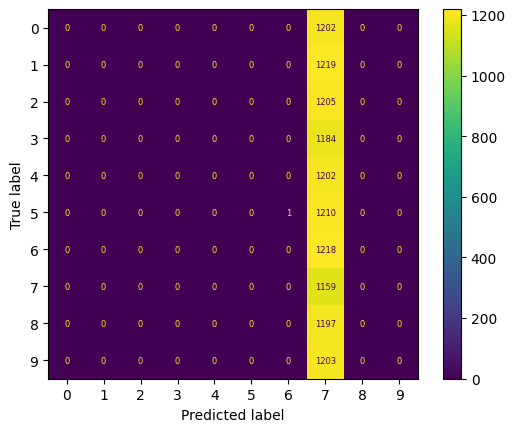

In [254]:
grafica = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_classes))
grafica.plot()
plt.show()


In [208]:
y_pred_classes

array([7, 7, 7, ..., 7, 7, 7])

In [209]:
print(y_pred_names, sep="")

['Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker', 'Sneaker'

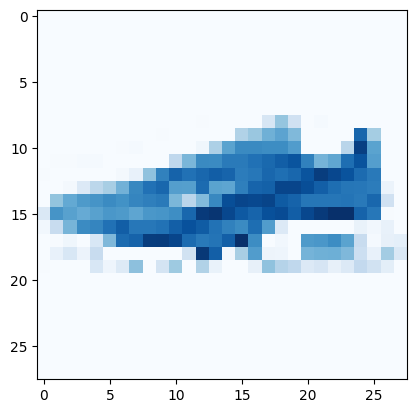

In [210]:
plt.imshow(X_train[1159], cmap = "Blues")

EL modelo, que ha sido probado con varios aoptimizadores(adam, SGB) y varias metricas("AUC", "Accuracy" y "Recal"), habiendo jugado con los batch y epocas, el resultado no ha sido bueno, habiendo acertado,úmicamente, en 2 imagenes y una 3 en duda, etiquetadas con el numero 7 que corresponde a  zapatillas deportivas, todo lo cual y relacionandolo con las metricas del informe de clasficicacion el modelo no ha funcionado muy bien, ya que ha acertado un 30% del total de aciertos.
En las graficas se observan como las linea de accuracy se separa mucho de los puntos de la funcion de perdida

In [255]:
#Evaluamos resultados y seleccionamos predicciones con alta confianza
def evaluacion(imagen, etiquetas, predicciones, threshold=0.7):
    buenos = predicciones.argmax(axis=1) == etiquetas

    mayor_confianza_errores = []
    for i, correcto in enumerate(buenos):
      if not correcto and np.max(predicciones[i]) > threshold:
           error = (i, predicciones[i], etiquetas[i], np.max(predicciones[i]))
           mayor_confianza_errores.append(error)

    print("mayor_confianza de errores:")
    for i, pre_class, true_class, confianza in mayor_confianza_errores:
        print(f"Índice: {i}, Predicción: {pre_class.argmax()}, Etiqueta real: {true_class}, Confianza: {confianza}")

    return mayor_confianza_errores

In [256]:
mayor_confianza_errores = evaluacion(X_test, y_test, y_pred)

mayor_confianza de errores:
Índice: 5571, Predicción: 6, Etiqueta real: 5, Confianza: 0.9999826550483704


In [259]:
X_test[5571]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   7,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  95, 144, 175, 154, 189, 180, 186, 162,
          8,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  84, 184, 239, 165, 209, 213, 192, 215,
         43,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   6,  24,   0,   0,   0,   0, 157,
         43,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 114,
         44,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2,   3,   1,   2,   3,   0,  95,
         87,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0, 168,
        169,   0],
       [  0,   1,   1,   0,   3,  32,  20,  66,  14,   0,   1,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 214,
        176,  14],
       [  0,   0,   0,   0,   0,  11,   0,  82,  61,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 148, 222, 199,
        200,  92],
       [  0,   0,   5,   2,   8,   4,   0,  43,  72,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 146, 218, 193, 202,
        210, 144],
       [ 34,  52,  29,  21,  24,  28,  60, 120,  72,  59,  57,  60,  66,
         81,  91, 103, 112, 119, 123, 119, 120, 172, 255, 188, 199, 200,
        225, 106],
       [ 23,  64,  78,  86,  77,  90,  99,  71,  76,  95,  82,  76,  68,
         55,  49,  39,  30,  23,   5,  15, 111, 107,  79,  83,  86,  77,
         89,   7],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [264]:
y_test[5]

4

In [265]:
labels.iloc[:,4]

0    Coat
Name: 4, dtype: object

In [262]:
labels.iloc[:,6]

0    Shirt
Name: 6, dtype: object

In [296]:
# Función para mostrar imágenes y etiquetas de predicciones con alta confianza
def imagenes_predic_confianza(imagenes, etiquetas, predicccion, mayor_confianza_errores, num_images=5):
  plt.figure(figsize=(15, 6))
  for i in range(min(num_images, len(mayor_confianza_errores))):
      index, pred_prob, true_class, confianza = mayor_confianza_errores[i]
      plt.subplot(2, num_images, i + 1)
      plt.imshow(imagenes[index], cmap='gray')
      plt.title(f"True: {true_class}\nPred: {pred_prob.argmax()}\nConfianza: {confianza:.2f}")
      plt.axis('off')

      plt.subplot(2,num_images, num_images + i + 1)
      plt.bar(range(10), pred_prob, color='blue')
      plt.xticks(range(10))
      plt.ylim([0, 1])
      plt.title("Confianza")
      plt.xlabel("Clase")
      plt.ylabel("Probabilidad")
  plt.tight_layout()
  plt.show()


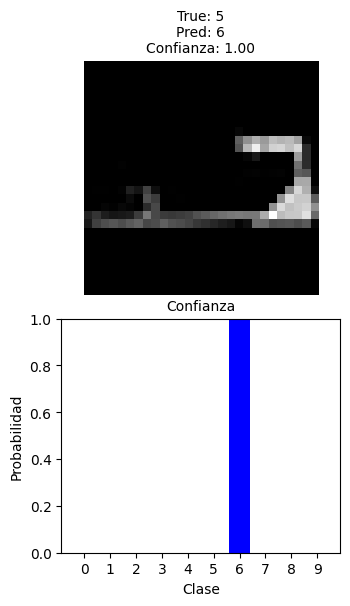

In [295]:
imagenes_predic_confianza(X_test, y_test, y_pred, mayor_confianza_errores)

In [251]:
labels=pd.DataFrame([label_class_dict])

In [252]:
labels

,0,1,2,3,4,5,6,7,8,9
0,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot



**EXTRA**: Como parte extra, obtén los errores de clasificación en los que la confianza del modelo sobre su clasificación errónea supere el 0.7 o 70% (es decir los errores en los que la probabilidad de la clase elegida, equivocadamente, fuera igual o superior a 0.7), de existir muéstralos y analiza si son de alguna clase específica.

In [211]:
3#Calcular las predicciones del modelo

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

375/375 [==============================] - 1s 2ms/step


In [213]:
#Comparar las predicciones con las etiquetas reales para identificar los errores
indices_error = np.where(y_pred_classes != y_test)[0]
indices_error

array([    0,     1,     3, ..., 11997, 11998, 11999])

In [214]:
# Calculo la confianza maxima del modelo de predicciones
confia = np.max(y_pred, axis=1)
confia

array([0.10156128, 0.10156128, 0.10156128, ..., 0.10156128, 0.10156128,
       0.10156128], dtype=float32)

In [216]:
# Filtramos los errores donde la confianza durante la clasificación errónea supere el 70%
errores_70 = []
for i in indices_error:
    if confia[i] > 0.7:
        errores_70.append((i, y_pred_classes[i], y_test[i], confia[i]))#agrego una tupla con los valores mas importantes
errores_70

[(5571, 6, 5, 0.99998266)]

In [217]:
#Muestro los errores junto con la confianza del modelo
for i, pre_class, true_class, confianza in errores_70:
    print(f"Índice: {i}, Predicción: {pre_class}, Etiqueta real: {true_class}, Confianza: {confianza}")


Índice: 5571, Predicción: 6, Etiqueta real: 5, Confianza: 0.9999826550483704
